Wrangling generically useful packages

In [20]:
import pandas as pd
import requests
from time import sleep
import matplotlib.pyplot as plt
import numpy as np

# Pulling data from the fencing database and storing as a dataframe

In [7]:
response = requests.get("https://fencingdatabase.com/api/clips/answers")

<Response [200]>

In [8]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

Create dataframe and seperate each weapon

In [10]:
test = pd.json_normalize(response.json()['answers'])
test

,stats_id,weapon,initiated,strip_location,body_location,created_date
0,DimwittedThisCoypu,epee,fotl,fotr_half,front_arm,1591130715
1,KnobbySereneFreshwatereel,epee,fotl,middle,front_arm,1591144965
2,KnobbySereneFreshwatereel,epee,fotl,fotr_half,front_arm,1591156220
3,AnyVelvetyIvorybackedwoodswallow,epee,fotl,fotl_warning_box,torso,1591555506
4,EcstaticSilverHammerheadshark,epee,fotl,fotr_half,front_arm,1592342612
...,...,...,...,...,...,...
95,PeacefulDimBarb,epee,fotr,fotr_half,head,1595628885
96,FluidPointedIridescentshark,epee,fotr,middle,torso,1595628914
97,MilkyNeighboringGreathornedowl,epee,fotl,middle,torso,1595628941
98,NeglectedSpanishCavy,epee,fotr,fotl_half,front_arm,1595628973


In [32]:
epee = test[test['weapon'] == "epee"]
saber = test[test['weapon'] == "sabre"]

In [45]:
loop = list(range(0, 7900, 100))
print(loop)

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800]


In [55]:
fencing = pd.DataFrame()
numbers_worked = []
url = ("https://fencingdatabase.com/api/clips/answers/")
for number in loop:
    print('Asking Big Dog for ' + str(number))
    try:
        response = requests.get("https://fencingdatabase.com/api/clips/answers/" + str(number))
        fencing.merge(pd.json_normalize(response.json()['answers']))
        numbers_worked.append(number)
    except:
        continue
    sleep(2)

Asking Big Dog for 0
Asking Big Dog for 100
Asking Big Dog for 200
Asking Big Dog for 300
Asking Big Dog for 400
Asking Big Dog for 500
Asking Big Dog for 600
Asking Big Dog for 700
Asking Big Dog for 800
Asking Big Dog for 900
Asking Big Dog for 1000
Asking Big Dog for 1100
Asking Big Dog for 1200
Asking Big Dog for 1300
Asking Big Dog for 1400
Asking Big Dog for 1500
Asking Big Dog for 1600
Asking Big Dog for 1700
Asking Big Dog for 1800
Asking Big Dog for 1900
Asking Big Dog for 2000
Asking Big Dog for 2100
Asking Big Dog for 2200
Asking Big Dog for 2300
Asking Big Dog for 2400
Asking Big Dog for 2500
Asking Big Dog for 2600
Asking Big Dog for 2700
Asking Big Dog for 2800
Asking Big Dog for 2900
Asking Big Dog for 3000
Asking Big Dog for 3100
Asking Big Dog for 3200
Asking Big Dog for 3300
Asking Big Dog for 3400
Asking Big Dog for 3500
Asking Big Dog for 3600
Asking Big Dog for 3700
Asking Big Dog for 3800
Asking Big Dog for 3900
Asking Big Dog for 4000
Asking Big Dog for 4100
Aski

In [59]:
total_df = pd.concat([fencing[0],fencing[1]])
for i in fencing[2:]:
    total_df = pd.concat([total_df,i])

In [61]:
total_df.head()
total_df.to_csv("fencingdb_dump.csv")

Some quick visualizations

<Axes: xlabel='body_location'>

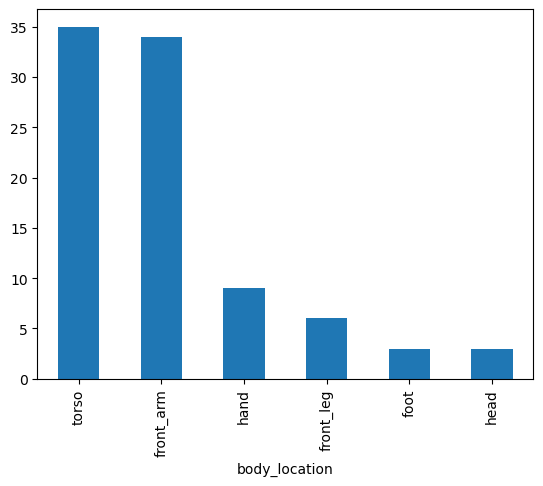

In [27]:
epee["body_location"].value_counts().plot(kind="bar")

<Axes: xlabel='body_location'>

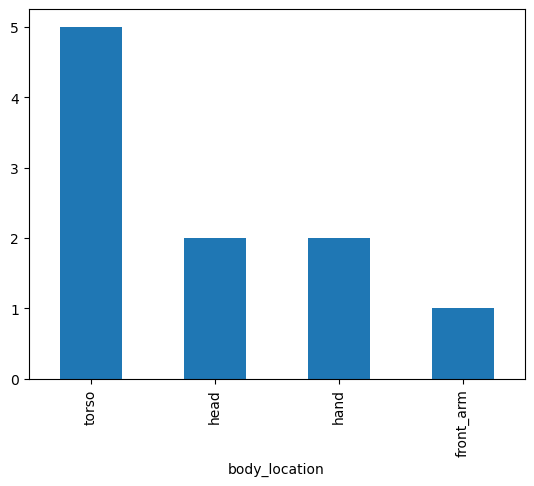

In [33]:
saber["body_location"].value_counts().plot(kind="bar")

<Axes: xlabel='strip_location'>

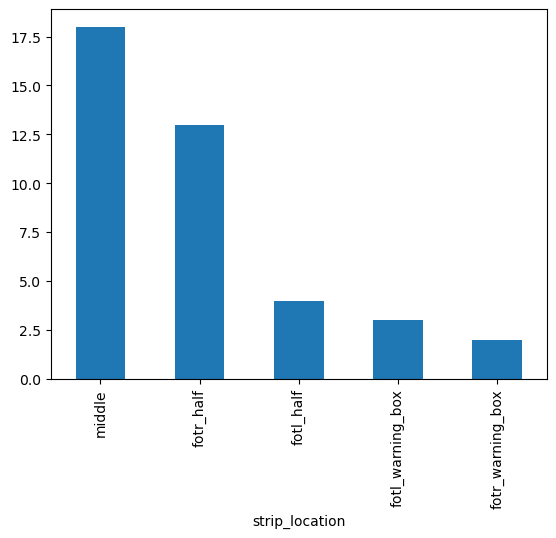

In [37]:
epee_fotl = epee[epee['initiated'] == 'fotl']
epee_fotl['strip_location'].value_counts().plot(kind='bar')

<Axes: xlabel='strip_location'>

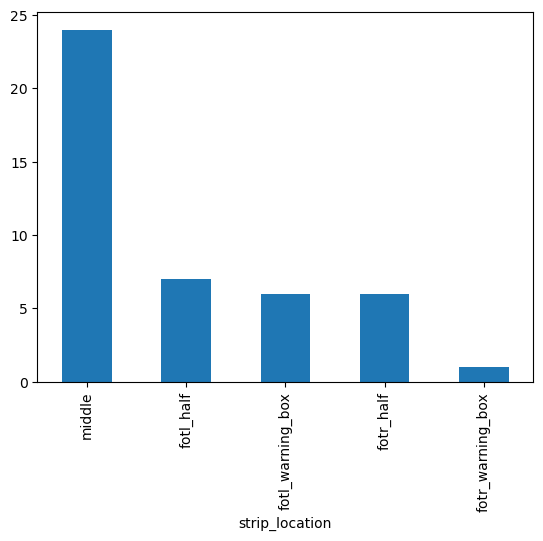

In [38]:
epee_fotr = epee[epee['initiated'] == 'fotr']
epee_fotr['strip_location'].value_counts().plot(kind='bar')

<Axes: xlabel='strip_location'>

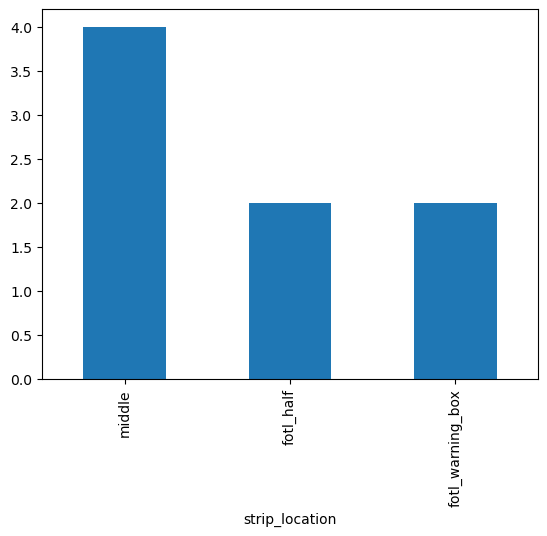

In [40]:
saber_fotr = saber[saber['initiated'] == 'fotr']
saber_fotr['strip_location'].value_counts().plot(kind='bar')


<Axes: xlabel='strip_location'>

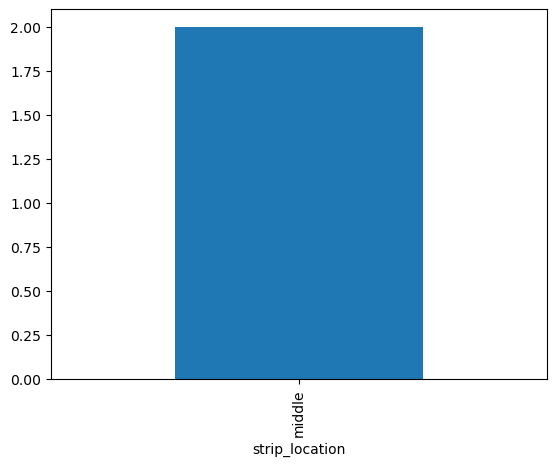

In [42]:
saber_fotl = saber[saber['initiated'] == 'fotl']
saber_fotl['strip_location'].value_counts().plot(kind='bar')